In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-04-07 18:34:46--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.23.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  28.2MB/s    in 3.0s    

2024-04-07 18:34:50 (28.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model = InceptionV3(
    input_shape=( 150, 150, 3),
    include_top=False,
    weights=None
)

pre_trained_model.load_weights( local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

In [3]:
# pre_trained_model.summary()

In [4]:
last_layer = pre_trained_model.get_layer( "mixed7")
print( "last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()( last_output)
x = layers.Dense( 1024, activation="relu")( x)
x = layers.Dropout( 0.2)( x)
x = layers.Dense( 1, activation="sigmoid")( x)

model = Model( pre_trained_model.input, x)

# model.summary()

In [6]:
model.compile(
    optimizer=RMSprop( learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=[ "accuracy"]
)

In [7]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-04-07 18:35:29--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 142.251.8.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  21.8MB/s    in 3.0s    

2024-04-07 18:35:32 (21.8 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [8]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile( "./cats_and_dogs_filtered.zip")
zip_ref.extractall( "tmp/")
zip_ref.close()

base_dir = "tmp/cats_and_dogs_filtered"

train_dir = os.path.join( base_dir, "train")
validation_dir = os.path.join( base_dir, "validation")

train_cats_dir = os.path.join( train_dir, "cats")
train_dogs_dir = os.path.join( train_dir, "dogs")

validation_cats_dir = os.path.join( validation_dir, "cats")
validation_dogs_dir = os.path.join( validation_dir, "dogs")

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode="binary",
    target_size=( 150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode="binary",
    target_size=( 150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_steps=50,
    verbose=2
)

Epoch 1/10
100/100 - 24s - loss: 0.3533 - accuracy: 0.8480 - val_loss: 0.2373 - val_accuracy: 0.9170 - 24s/epoch - 236ms/step
Epoch 2/10
100/100 - 15s - loss: 0.2116 - accuracy: 0.9155 - val_loss: 0.0947 - val_accuracy: 0.9620 - 15s/epoch - 152ms/step
Epoch 3/10
100/100 - 16s - loss: 0.1940 - accuracy: 0.9195 - val_loss: 0.0923 - val_accuracy: 0.9680 - 16s/epoch - 163ms/step
Epoch 4/10
100/100 - 15s - loss: 0.1605 - accuracy: 0.9345 - val_loss: 0.1486 - val_accuracy: 0.9430 - 15s/epoch - 155ms/step
Epoch 5/10
100/100 - 15s - loss: 0.1713 - accuracy: 0.9420 - val_loss: 0.1022 - val_accuracy: 0.9530 - 15s/epoch - 152ms/step
Epoch 6/10
100/100 - 15s - loss: 0.1608 - accuracy: 0.9405 - val_loss: 0.0874 - val_accuracy: 0.9720 - 15s/epoch - 152ms/step
Epoch 7/10
100/100 - 15s - loss: 0.1621 - accuracy: 0.9385 - val_loss: 0.0996 - val_accuracy: 0.9660 - 15s/epoch - 151ms/step
Epoch 8/10
100/100 - 15s - loss: 0.1376 - accuracy: 0.9470 - val_loss: 0.1110 - val_accuracy: 0.9630 - 15s/epoch - 150

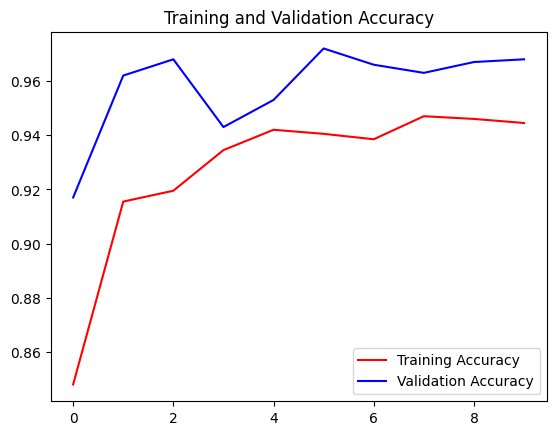

In [10]:
import matplotlib.pyplot as plt

acc = history.history[ "accuracy"]
val_acc = history.history[ "val_accuracy"]

epochs = range( len( acc))

plt.figure()

plt.plot( epochs, acc, "r", label="Training Accuracy")
plt.plot( epochs, val_acc, "b", label="Validation Accuracy")
plt.title( "Training and Validation Accuracy")
plt.legend()

plt.show()

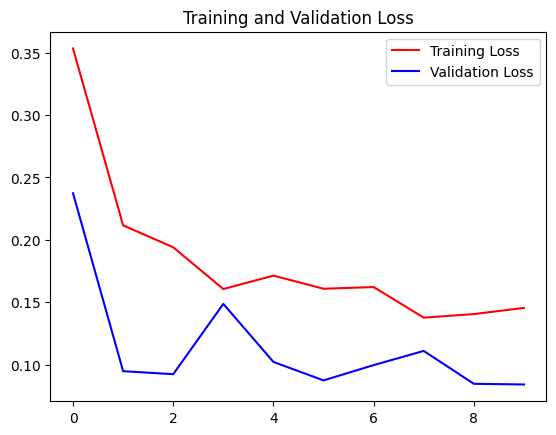

<Figure size 640x480 with 0 Axes>

In [11]:
loss = history.history[ "loss"]
val_loss = history.history[ "val_loss"]

epochs = range( len( loss))

plt.plot( epochs, loss, "r", label="Training Loss")
plt.plot( epochs, val_loss, "b", label="Validation Loss")
plt.title( "Training and Validation Loss")
plt.legend()
plt.figure()

plt.show()